In [41]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [42]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [43]:
model.add(keras.layers.MaxPooling2D(2))

In [44]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [45]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [54]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [55]:
keras.utils.plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [57]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5299 - accuracy: 0.8095 - val_loss: 0.3346 - val_accuracy: 0.8773
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3465 - accuracy: 0.8753 - val_loss: 0.2820 - val_accuracy: 0.8956
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2964 - accuracy: 0.8943 - val_loss: 0.2568 - val_accuracy: 0.9019
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2645 - accuracy: 0.9029 - val_loss: 0.2405 - val_accuracy: 0.9113
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2427 - accuracy: 0.9107 - val_loss: 0.2249 - val_accuracy: 0.9171
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2188 - accuracy: 0.9193 - val_loss: 0.2242 - val_accuracy: 0.9193
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2036 - accuracy: 0.9250 - val_loss: 0.2232 - val_accu

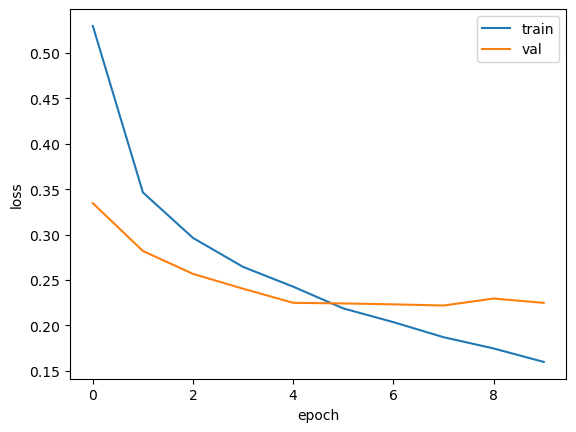

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [59]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.2219 - accuracy: 0.9215


[0.22194625437259674, 0.921500027179718]

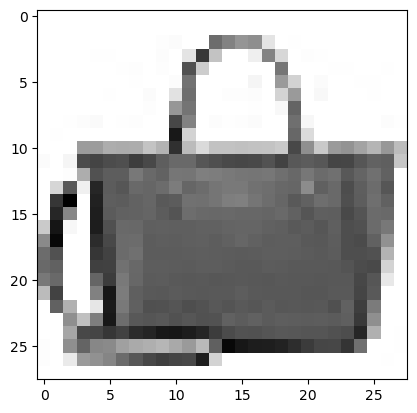

In [60]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [75]:
preds = model.predict(val_scaled[0 : 1])
print(preds)

1/1 [==============================] - 0s 12ms/step
[[5.1867811e-17 1.8654969e-30 4.3201272e-20 4.4405459e-20 5.6778521e-21
  7.5283414e-19 3.2265834e-17 9.2587815e-19 1.0000000e+00 2.4737351e-19]]


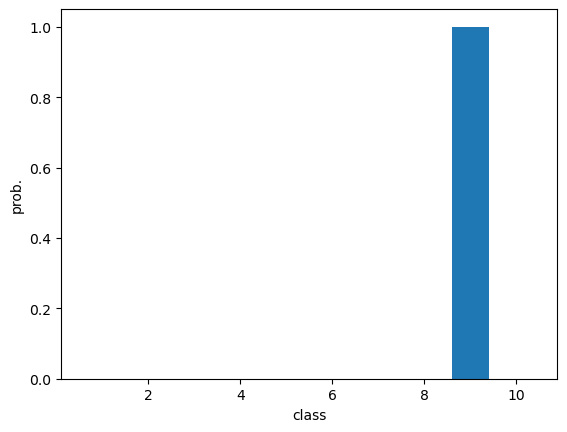

In [76]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [77]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [78]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [79]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [80]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2505 - accuracy: 0.9153


[0.250505656003952, 0.9153000116348267]